---

# The Single Neuron Model: The Perceptron & Predicting Credit Risk

The perceptron is a machine learning technique that is based on the behaviour of biological neurons. Broadly speaking, a perceptron has three components: 
- Pre-activation---a linear combination of weights plus a bias that serves as the "stimulus" for the neuron
- Post-activation---if the stimulus is "intense" enough, then the neuron "fires" and returns a value according to some rule
- Activation function---once the neuron "fires," it processes the stimulus through a predefined function, $\phi$

We will train and implement this model on a dataset of counterfeit and non-counterfeit bills collected by UCI to demonstrate how it works and some real-world applications. Let's begin by importing the relevant libraries.

---

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from perceptron import Perceptron

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

---

Next, load in the dataset that you'll be training on. Load the data into a dataframe and view it.

---

In [60]:
# Load the dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"

# Define column names based on the dataset description
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Load the dataset into a DataFrame
df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the DataFrame
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


---

Next, preprocess the data by separating the target class (counterfeit or genuine) from the feature vector. We will also convert the target labels from 1 and 0 to 1 and -1 for consistency.

---

In [61]:
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop('class', axis=1)
X = df[['variance', 'skewness', 'curtosis', 'entropy']] # Select only the features we want to use for training
y = df['class']

# Convert labels: 1 = good, 2 = bad → want 1 = good, -1 = bad
y = y.replace({1: 1, 0: -1})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


---

An important part of training any machine learning algorithm is separating the training set from the testing set. Here, we will randomly partition some of the data to be used for testing while keeping the training data completely distinct from it.

---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

array([ 1, -1])

---

With the data now separated, it's time to train the perceptron! We will be using the perceptron class found in the same folder as this notebook, which takes as its first input a learning rate and its second input a maximum number of epochs over which to iterate. 

---

In [63]:
model = Perceptron(0.01, 1000)
model.train(X_train, y_train)

---

Next, we'll use the predict method to see how well the perceptron is able to classify data outside of its test set, and then print the confusion matrix which contains the number of correct and incorrect classifications in each group.

---

In [64]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, -1])
print("Confusion Matrix:\n", cm)


Test Accuracy: 98.91%
Confusion Matrix:
 [[121   1]
 [  2 151]]


---

It's easier to see how the perceptron was trained by visualizing it on a graph and plotting the decision boundary. Using the plot_decision_regions method below, we can check what the model inferred. Because there are 4 dimensions to our data, we can't easily visualize entire feature vectors at once, but we can look at the 4C2 = 6 combinations of two dimensions.

---

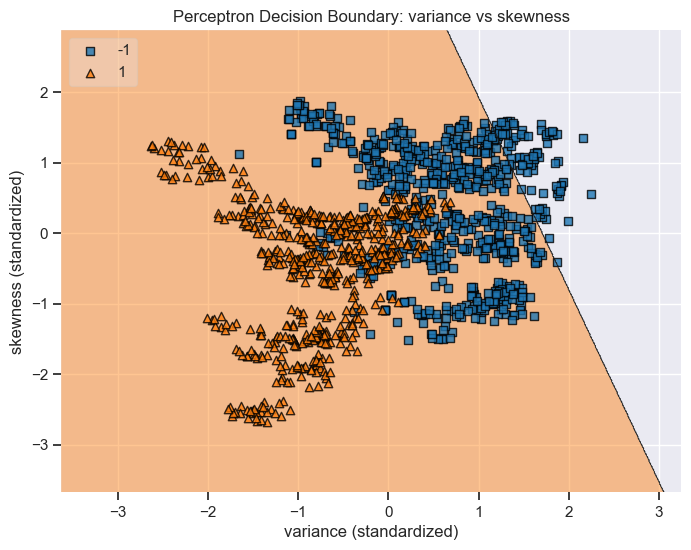

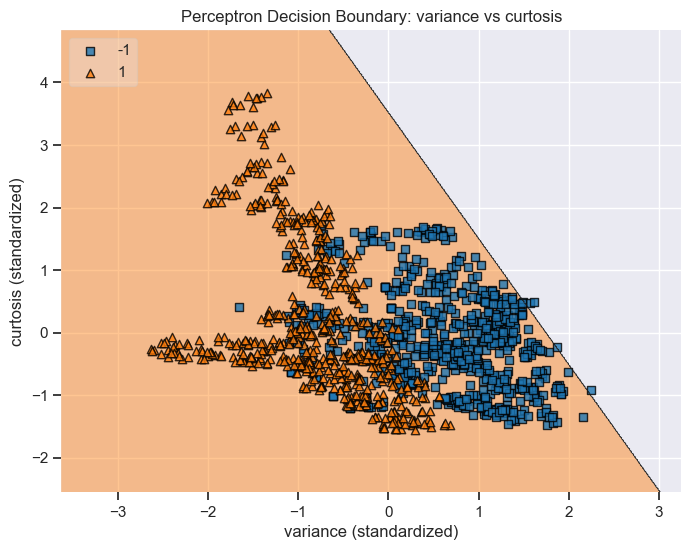

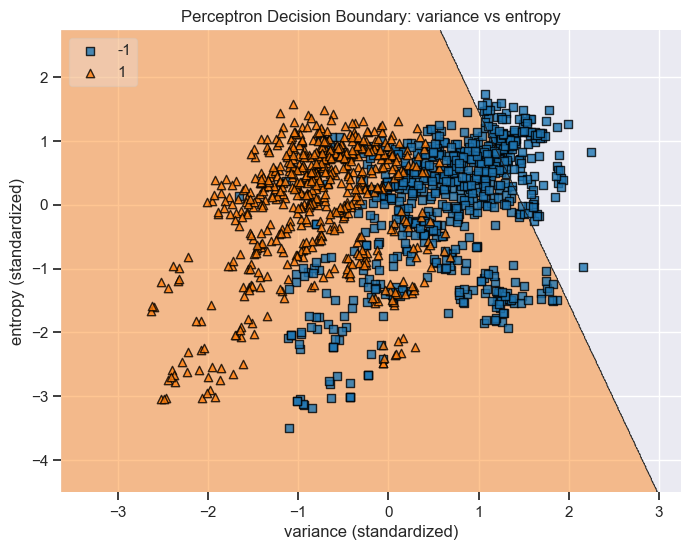

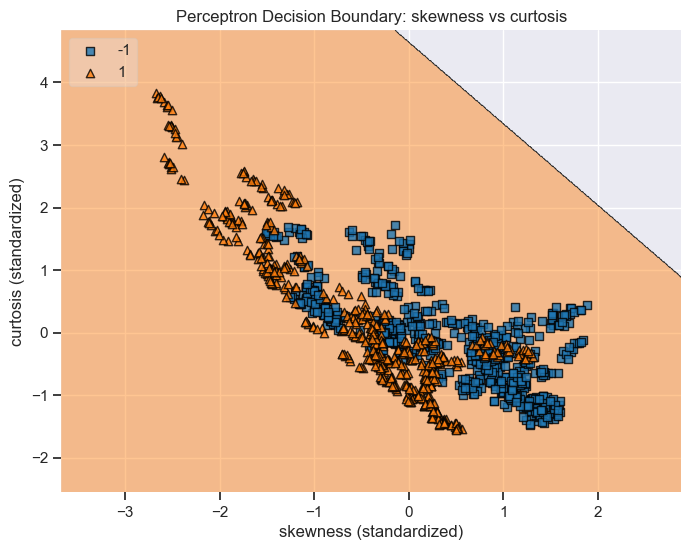

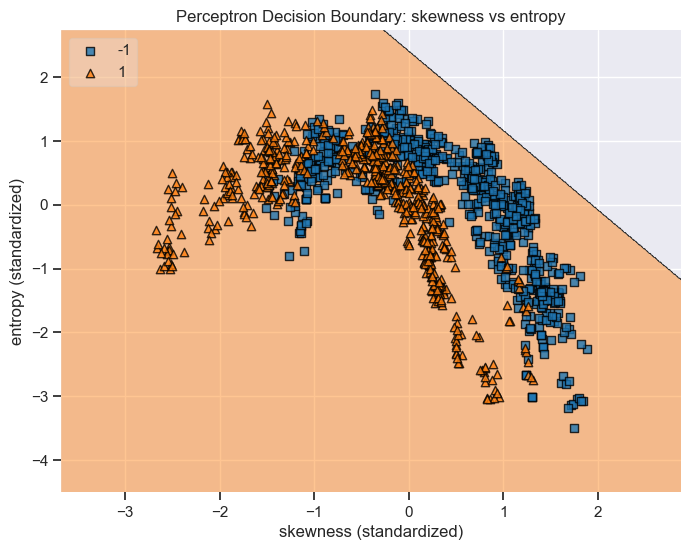

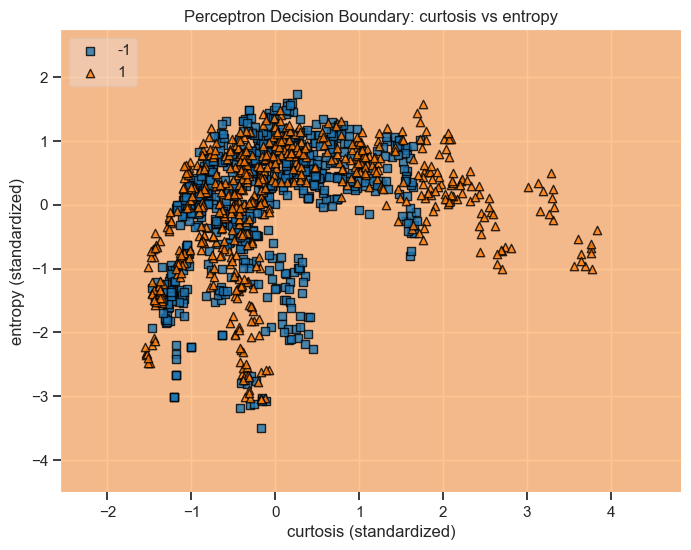

In [66]:
from itertools import combinations

# Generate decision region plots for all pairs of features
feature_names = ['variance', 'skewness', 'curtosis', 'entropy']
feature_combinations = list(combinations(range(len(feature_names)), 2))  # Generate all pairs of feature indices

for i, (f1, f2) in enumerate(feature_combinations):
    # Select only the two features for this iteration
    X_pair = X_scaled[:, [f1, f2]]
    
    # Train the perceptron on the selected features
    model = Perceptron(eta=0.01, epochs=1000)
    model.train(X_pair, y)
    
    # Plot decision regions
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X=X_pair, y=y.to_numpy(), clf=model, legend=2)
    
    # Add labels and title
    plt.xlabel(f'{feature_names[f1]} (standardized)')
    plt.ylabel(f'{feature_names[f2]} (standardized)')
    plt.title(f'Perceptron Decision Boundary: {feature_names[f1]} vs {feature_names[f2]}')
    plt.show()

---

As we can see above, because there are many dimensions to our feature vectors, the data doesn't appear very to be very seperable. However, if we refer to the above confusion matrix, we recall that the perceptron was actually able to acheive approximately 99% accuracy when considering the dataset in its totality: an impressive feat! We can try a few different training parameters for our perceptron to see if we can optimize it any further.

---

In [67]:
model = Perceptron(0.5, 50)
model.train(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, -1])
print("Confusion Matrix:\n", cm)

Test Accuracy: 98.55%
Confusion Matrix:
 [[122   0]
 [  4 149]]


---

Using a higher learning rate causes the model to make much larger corrections between epochs. Let's try the above learning rate again with a greater number of epochs to allow the perceptron more time to converge to a decision boundary.

---

In [68]:
model = Perceptron(0.5, 1000)
model.train(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, -1])
print("Confusion Matrix:\n", cm)

Test Accuracy: 98.91%
Confusion Matrix:
 [[121   1]
 [  2 151]]


---

It looks like the decision boundary didn't change much between epoch 50 and epoch 1000, which might lead us to believe that the model was able to minimize error relatively early-on. We can verify this by plotting the error of the model over time.

---

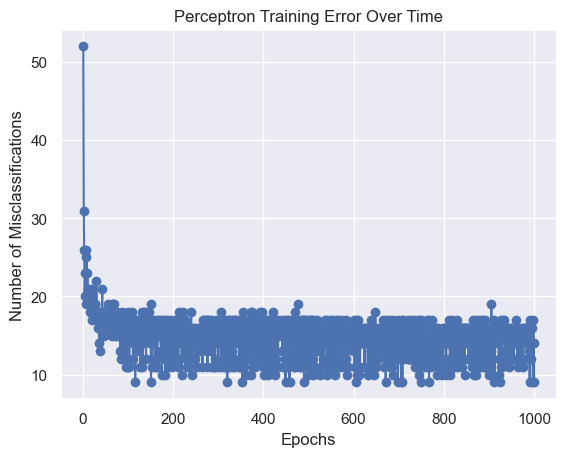

In [69]:
# Plot the error over time
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Training Error Over Time')
plt.show()

---

As we can see in the above graph, our perceptron greatly minimized its misclassifications within the first few iterations! In the following epochs, it simply oscillated between a few decision boundaries because the data wasn't perfectly linearly separable, meaning that the training could not converge to no errors. This isn't necessarily problematic, though; because we want to avoid overfitting our data, a small error allowance can actually lead to better quality of predictions in the long run!

---